https://www.kaggle.com/datasets/rishidamarla/cancer-patients-data/data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import  confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

In [ ]:
data=pd.read_csv('/content/cancer patient data sets.csv')

In [ ]:
data

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                       4             3                     2  ...        3   
1                       3             4                     2  ...        1   
2                       5             5                     4  ...        8   
3                       7             6                     7  ...        4   
4                       7             7                     6  ...        3   
..                    ...           ...                   ...  ...      ...   
995                     7             7                     6  ...        5   
996                     7             7                     6  ...        9   
997                     5             5                     4  ...        8   
998                     7             7                     6  ...        3   
999                     5             5                     4  ...        8   

     Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0              4                    2         2                      3   
1              3                    7         8                      6   
2              7                    9         2                      1   
3              2                    3         1                      4   
4              2                    4         1                      4   
..           ...                  ...       ...                    ...   
995            3                    2         7                      8   
996            6                    5         7                      2   
997            7                    9         2                      1   
998            2                    4         1                      4   
999            7                    9         2                      1   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                           1              2          3        4     Low  
1                           2              1          7        2  Medium  
2                           4              6          7        2    High  
3                           5              6          7        5    High  
4                           2              4          2        3    High  
..                        ...            ...        ...      ...     ...  
995                         2              4          5        3    High  
996                         4              3          1        4    High  
997                         4              6          7        2    High  
998                         2              4          2        3    High  
999                         4              6          7        2    High  

[1000 rows x 26 columns]

In [ ]:
data['Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [ ]:
data.Level.value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

In [ ]:
data.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [ ]:
data.nunique()

index                       1000
Patient Id                  1000
Age                           40
Gender                         2
Air Pollution                  8
Alcohol use                    8
Dust Allergy                   8
OccuPational Hazards           8
Genetic Risk                   7
chronic Lung Disease           7
Balanced Diet                  7
Obesity                        7
Smoking                        8
Passive Smoker                 8
Chest Pain                     9
Coughing of Blood              9
Fatigue                        8
Weight Loss                    8
Shortness of Breath            8
Wheezing                       8
Swallowing Difficulty          8
Clubbing of Finger Nails       9
Frequent Cold                  7
Dry Cough                      7
Snoring                        7
Level                          3
dtype: int64

In [ ]:
data.describe()

index          Age       Gender  Air Pollution  Alcohol use  \
count  1000.000000  1000.000000  1000.000000      1000.0000  1000.000000   
mean    499.500000    37.174000     1.402000         3.8400     4.563000   
std     288.819436    12.005493     0.490547         2.0304     2.620477   
min       0.000000    14.000000     1.000000         1.0000     1.000000   
25%     249.750000    27.750000     1.000000         2.0000     2.000000   
50%     499.500000    36.000000     1.000000         3.0000     5.000000   
75%     749.250000    45.000000     2.000000         6.0000     7.000000   
max     999.000000    73.000000     2.000000         8.0000     8.000000   

       Dust Allergy  OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count   1000.000000           1000.000000   1000.000000           1000.000000   
mean       5.165000              4.840000      4.580000              4.380000   
std        1.980833              2.107805      2.126999              1.848518   
min        1.000000              1.000000      1.000000              1.000000   
25%        4.000000              3.000000      2.000000              3.000000   
50%        6.000000              5.000000      5.000000              4.000000   
75%        7.000000              7.000000      7.000000              6.000000   
max        8.000000              8.000000      7.000000              7.000000   

       Balanced Diet  ...  Coughing of Blood      Fatigue  Weight Loss  \
count    1000.000000  ...        1000.000000  1000.000000  1000.000000   
mean        4.491000  ...           4.859000     3.856000     3.855000   
std         2.135528  ...           2.427965     2.244616     2.206546   
min         1.000000  ...           1.000000     1.000000     1.000000   
25%         2.000000  ...           3.000000     2.000000     2.000000   
50%         4.000000  ...           4.000000     3.000000     3.000000   
75%         7.000000  ...           7.000000     5.000000     6.000000   
max         7.000000  ...           9.000000     9.000000     8.000000   

       Shortness of Breath     Wheezing  Swallowing Difficulty  \
count          1000.000000  1000.000000            1000.000000   
mean              4.240000     3.777000               3.746000   
std               2.285087     2.041921               2.270383   
min               1.000000     1.000000               1.000000   
25%               2.000000     2.000000               2.000000   
50%               4.000000     4.000000               4.000000   
75%               6.000000     5.000000               5.000000   
max               9.000000     8.000000               8.000000   

       Clubbing of Finger Nails  Frequent Cold    Dry Cough      Snoring  
count               1000.000000    1000.000000  1000.000000  1000.000000  
mean                   3.923000       3.536000     3.853000     2.926000  
std                    2.388048       1.832502     2.039007     1.474686  
min                    1.000000       1.000000     1.000000     1.000000  
25%                    2.000000       2.000000     2.000000     2.000000  
50%                    4.000000       3.000000     4.000000     3.000000  
75%                    5.000000       5.000000     6.000000     4.000000  
max                    9.000000       7.000000     7.000000     7.000000  

[8 rows x 24 columns]

In [ ]:
d1=data

In [ ]:
d1.drop(columns=['index','Patient Id'],inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_y= LabelEncoder()
d1['Level'] = le_y.fit_transform(d1['Level'])

In [ ]:
d1.head()

Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0   33       1              2            4             5   
1   17       1              3            1             5   
2   35       1              4            5             6   
3   37       1              7            7             7   
4   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   Obesity  ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0        4  ...        3            4                    2         2   
1        2  ...        1            3                    7         8   
2        7  ...        8            7                    9         2   
3        7  ...        4            2                    3         1   
4        7  ...        3            2                    4         1   

   Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  Dry Cough  \
0                      3                         1              2          3   
1                      6                         2              1          7   
2                      1                         4              6          7   
3                      4                         5              6          7   
4                      4                         2              4          2   

   Snoring  Level  
0        4      1  
1        2      2  
2        2      0  
3        5      0  
4        3      0  

[5 rows x 24 columns]

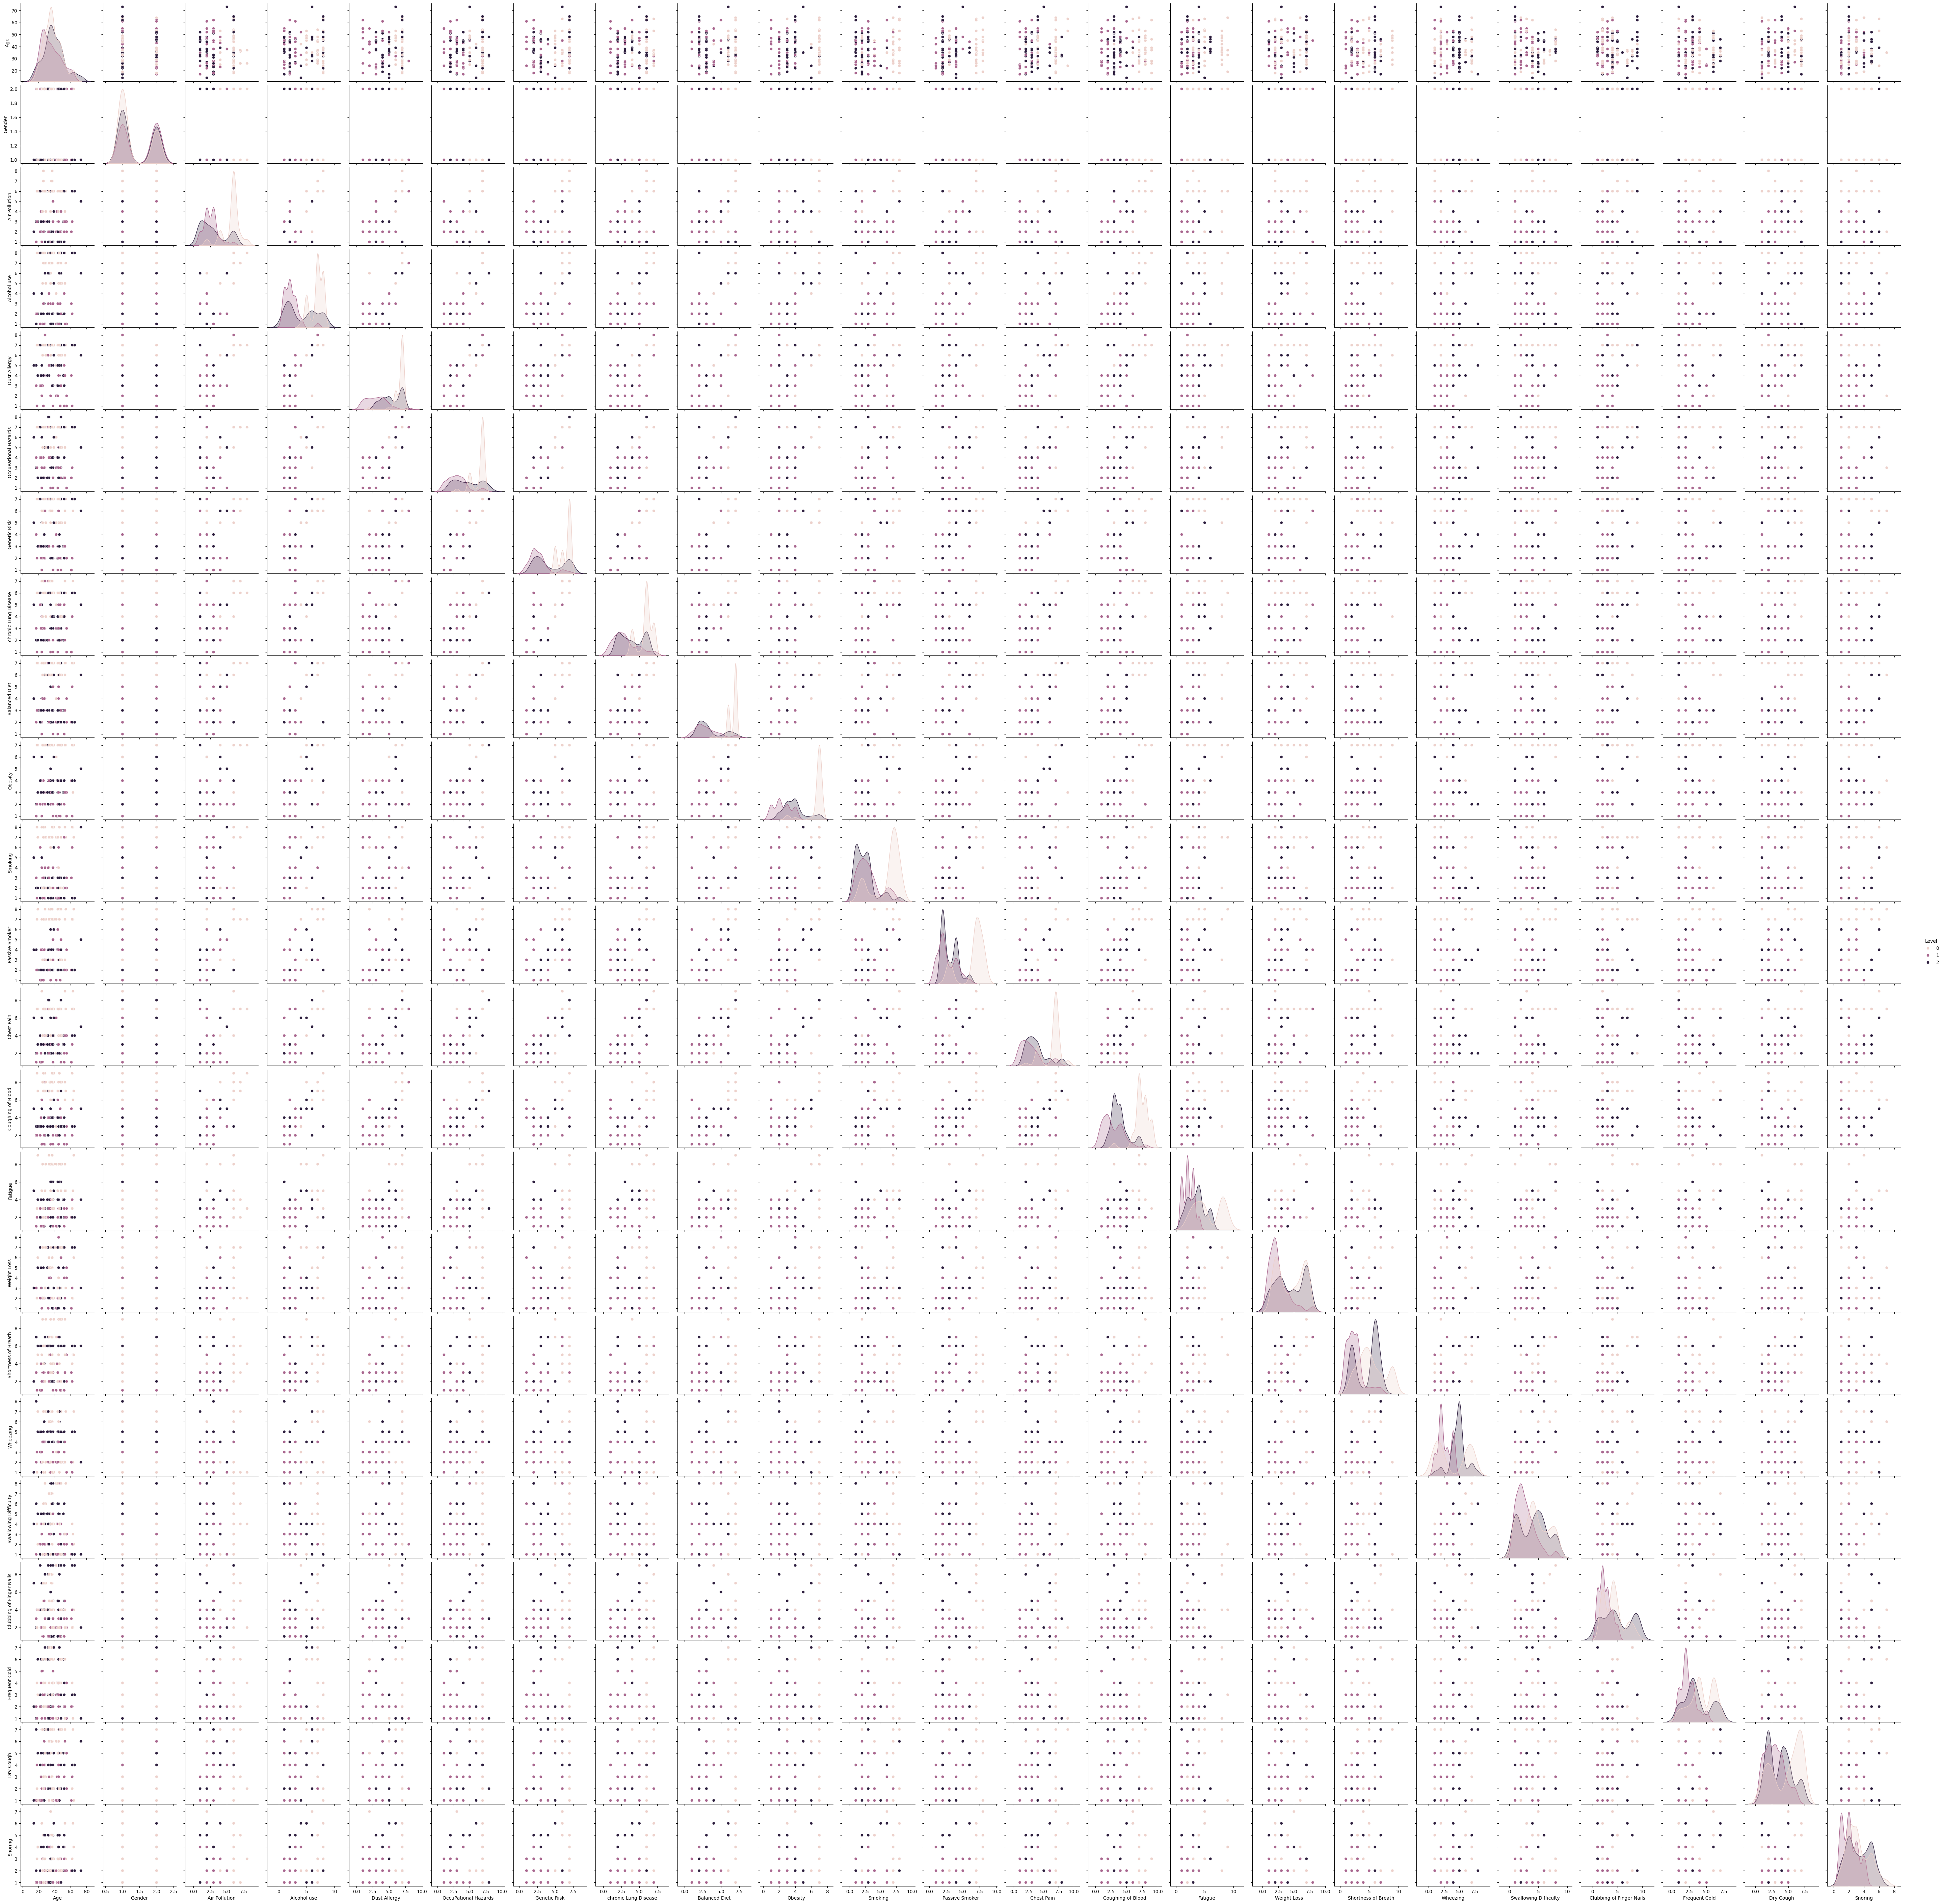

In [ ]:

sns.pairplot(d1,hue='Level')

In [ ]:
x1=d1.drop(columns='Level')

In [ ]:
y=d1['Level']

In [ ]:
y.value_counts()

Level
0    365
2    332
1    303
Name: count, dtype: int64

In [ ]:
x1.head()

Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0   33       1              2            4             5   
1   17       1              3            1             5   
2   35       1              4            5             6   
3   37       1              7            7             7   
4   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   Obesity  ...  Coughing of Blood  Fatigue  Weight Loss  Shortness of Breath  \
0        4  ...                  4        3            4                    2   
1        2  ...                  3        1            3                    7   
2        7  ...                  8        8            7                    9   
3        7  ...                  8        4            2                    3   
4        7  ...                  9        3            2                    4   

   Wheezing  Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  \
0         2                      3                         1              2   
1         8                      6                         2              1   
2         2                      1                         4              6   
3         1                      4                         5              6   
4         1                      4                         2              4   

   Dry Cough  Snoring  
0          3        4  
1          7        2  
2          7        2  
3          7        5  
4          2        3  

[5 rows x 23 columns]

In [ ]:
y.head()

0    1
1    2
2    0
3    0
4    0
Name: Level, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=10)

In [ ]:
y_test.value_counts()

Level
2    110
0    103
1     87
Name: count, dtype: int64

In [ ]:
ros=RandomOverSampler(random_state=42)
rosx, rosy = ros.fit_resample(x1_test, y_test)

In [ ]:
rosy.value_counts()

Level
2    110
0    110
1    110
Name: count, dtype: int64

In [ ]:
y_test

841    2
956    0
544    0
173    1
759    0
      ..
949    1
802    2
293    2
414    2
260    1
Name: Level, Length: 300, dtype: int64

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "NB": GaussianNB(),
    "SVM": SVC()
}

results = {}

for model_name, model in models.items():

    model.fit(x1_train, y_train)

    acc=model.score(x1_test,y_test)


    y_pred = model.predict(x1_test)


    mae = mean_absolute_error(y_test, y_pred)





    print(f'{model_name} - ACCURACY: {acc:.4f} MAE: {mae:.4f}')



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - ACCURACY: 0.9967 MAE: 0.0033
Decision Tree - ACCURACY: 1.0000 MAE: 0.0000
Random Forest - ACCURACY: 1.0000 MAE: 0.0000
KNN - ACCURACY: 0.9967 MAE: 0.0033
NB - ACCURACY: 0.9033 MAE: 0.1500
SVM - ACCURACY: 0.9633 MAE: 0.0433


# **Logistic Regression**

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(x1_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
logmodel.score(x1_test,y_test)

0.9966666666666667

In [ ]:
predictions1 = logmodel.predict(x1_test)

In [ ]:
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       0.99      1.00      0.99        87
           2       1.00      0.99      1.00       110

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [ ]:
print(confusion_matrix(y_test, predictions1))

[[103   0   0]
 [  0  87   0]
 [  0   1 109]]


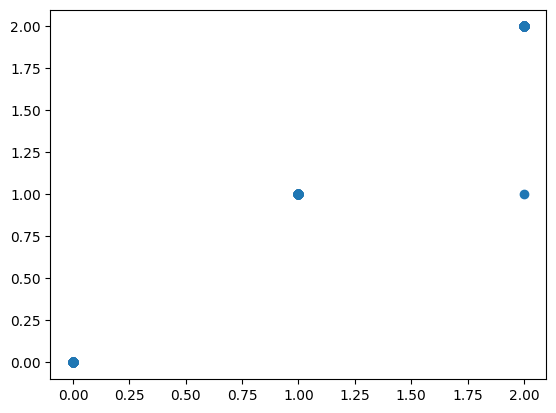

In [ ]:
plt.scatter(y_test,predictions1)

In [ ]:
predictions1os = logmodel.predict(rosx)

In [ ]:
print(classification_report(rosy,predictions1os))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       0.99      1.00      1.00       110
           2       1.00      0.99      1.00       110

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



In [ ]:
print(confusion_matrix(rosy, predictions1os))

[[110   0   0]
 [  0 110   0]
 [  0   1 109]]


# **SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm=SVC()

In [ ]:

svm.fit(x1_train,y_train)

SVC()

In [ ]:
svm.score(x1_test,y_test)

0.9633333333333334

In [ ]:
predictions2 = svm.predict(x1_test)

In [ ]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       103
           1       1.00      0.90      0.95        87
           2       0.92      0.98      0.95       110

    accuracy                           0.96       300
   macro avg       0.97      0.96      0.96       300
weighted avg       0.97      0.96      0.96       300



In [ ]:
print(confusion_matrix(y_test, predictions2))

[[103   0   0]
 [  0  78   9]
 [  2   0 108]]


In [ ]:
predictions2os = svm.predict(rosx)

In [ ]:
print(classification_report(rosy,predictions2os))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       110
           1       1.00      0.90      0.95       110
           2       0.91      0.98      0.94       110

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330



In [ ]:
print(confusion_matrix(rosy, predictions2os))

[[110   0   0]
 [  0  99  11]
 [  2   0 108]]


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x1_train,y_train)

RandomForestClassifier()

In [ ]:
rf.score(x1_test,y_test)

1.0

In [ ]:
predictions3 = rf.predict(x1_test)

In [ ]:
print(classification_report(y_test,predictions3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        87
           2       1.00      1.00      1.00       110

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [ ]:
print(confusion_matrix(y_test, predictions3))

[[103   0   0]
 [  0  87   0]
 [  0   0 110]]


In [ ]:
predictions3os = rf.predict(rosx)

In [ ]:
print(classification_report(rosy,predictions3os))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       110
           2       1.00      1.00      1.00       110

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



In [ ]:
print(confusion_matrix(rosy, predictions3os))

[[110   0   0]
 [  0 110   0]
 [  0   0 110]]


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:


knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x1_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_model.score(x1_test,y_test)

0.9966666666666667

In [ ]:
predictions4 = knn_model.predict(x1_test)

In [ ]:
print(classification_report(y_test,predictions4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      0.99      0.99        87
           2       0.99      1.00      1.00       110

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [ ]:
print(confusion_matrix(y_test, predictions4))

[[103   0   0]
 [  0  86   1]
 [  0   0 110]]


In [ ]:
predictions4os = knn_model.predict(rosx)

In [ ]:
print(classification_report(rosy, predictions4os))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      0.99      1.00       110
           2       0.99      1.00      1.00       110

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



In [ ]:
print(confusion_matrix(rosy, predictions4os))

[[110   0   0]
 [  0 109   1]
 [  0   0 110]]


# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb_model = GaussianNB()
gnb_model.fit(x1_train, y_train)

GaussianNB()

In [ ]:
gnb_model.score(x1_test,y_test)

0.9033333333333333

In [ ]:
predictions5 = gnb_model.predict(x1_test)

In [ ]:
print(classification_report(y_test,predictions5))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       103
           1       1.00      0.85      0.92        87
           2       0.87      0.91      0.89       110

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300



In [ ]:
predictions5os = gnb_model.predict(rosx)

In [ ]:
print(classification_report(rosy, predictions5os))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90       110
           1       1.00      0.85      0.92       110
           2       0.86      0.91      0.88       110

    accuracy                           0.90       330
   macro avg       0.91      0.90      0.90       330
weighted avg       0.91      0.90      0.90       330



In [ ]:
print(confusion_matrix(rosy, predictions5os))

[[104   0   6]
 [  6  94  10]
 [ 10   0 100]]


# **Decision Tree**

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x1_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(x1_test,y_test)

1.0

In [ ]:
predictions6 = dt.predict(x1_test)

In [ ]:
print(classification_report(y_test,predictions6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        87
           2       1.00      1.00      1.00       110

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [ ]:
print(confusion_matrix(y_test,predictions6))

[[103   0   0]
 [  0  87   0]
 [  0   0 110]]


In [ ]:
predictions6os = dt.predict(rosx)

In [ ]:
print(classification_report(rosy,predictions6os))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       110
           2       1.00      1.00      1.00       110

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



In [ ]:
print(confusion_matrix(rosy,predictions6os))

[[110   0   0]
 [  0 110   0]
 [  0   0 110]]


# **KFOLD CROSS VALIDATION**

In [ ]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5,random_state=42, shuffle=True)
kf

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [ ]:
from sklearn.model_selection import KFold
kf1 = KFold(n_splits=5,random_state=42, shuffle=True)
for train_index, test_index in kf1.split([1,2,3,4,5,6,7,8,9,10]):
    print(train_index, test_index)

[0 2 3 4 5 6 7 9] [1 8]
[1 2 3 4 6 7 8 9] [0 5]
[0 1 3 4 5 6 8 9] [2 7]
[0 1 2 3 5 6 7 8] [4 9]
[0 1 2 4 5 7 8 9] [3 6]


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scorelm = cross_val_score(logmodel, x1, y, cv=kf, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
print(f"Logistic Model Accuracy Scores for each fold: {scorelm}")
print(f"Mean Accuracy: {scorelm.mean():.2f}")
print(f"Standard Deviation: {scorelm.std():.2f}")

Logistic Model Accuracy Scores for each fold: [1.    0.985 0.995 0.985 1.   ]
Mean Accuracy: 0.99
Standard Deviation: 0.01


In [ ]:
scoresvm = cross_val_score(svm, x1, y, cv=kf, scoring='accuracy')

In [ ]:
print(f"SVM Accuracy Scores for each fold: {scoresvm}")
print(f"Mean Accuracy: {scoresvm.mean():.2f}")
print(f"Standard Deviation: {scoresvm.std():.2f}")

SVM Accuracy Scores for each fold: [0.985 0.98  0.97  0.95  0.985]
Mean Accuracy: 0.97
Standard Deviation: 0.01


In [ ]:
scorerf = cross_val_score(rf, x1, y, cv=kf, scoring='accuracy')

In [ ]:
print(f"RF Accuracy Scores for each fold: {scorerf}")
print(f"Mean Accuracy: {scorerf.mean():.2f}")
print(f"Standard Deviation: {scorerf.std():.2f}")

RF Accuracy Scores for each fold: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.00
Standard Deviation: 0.00


In [ ]:
scoreknn = cross_val_score(knn_model, x1, y, cv=kf, scoring='accuracy')

In [ ]:
print(f"KNN Accuracy Scores for each fold: {scoreknn}")
print(f"Mean Accuracy: {scoreknn.mean():.2f}")
print(f"Standard Deviation: {scoreknn.std():.2f}")

KNN Accuracy Scores for each fold: [1.    1.    1.    0.995 0.995]
Mean Accuracy: 1.00
Standard Deviation: 0.00


In [ ]:
scoredt = cross_val_score(dt, x1, y, cv=kf, scoring='accuracy')

In [ ]:
print(f"Decision Tree Accuracy Scores for each fold: {scoredt}")
print(f"Mean Accuracy: {scoredt.mean():.2f}")
print(f"Standard Deviation: {scoredt.std():.2f}")

Decision Tree Accuracy Scores for each fold: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.00
Standard Deviation: 0.00


In [ ]:
scoregnb = cross_val_score(gnb_model, x1, y, cv=kf, scoring='accuracy')

In [ ]:
print(f"Decision Tree Accuracy Scores for each fold: {scoregnb}")
print(f"Mean Accuracy: {scoregnb.mean():.2f}")
print(f"Standard Deviation: {scoregnb.std():.2f}")

Decision Tree Accuracy Scores for each fold: [0.91 0.88 0.89 0.87 0.9 ]
Mean Accuracy: 0.89
Standard Deviation: 0.01
